## Google Stock Price Prediction using Recurrent Neural Network

#### Part 1: Data Preprocessing

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# import training set
training_set=pd.read_csv('Google_Stock_Price_Train.csv')
training_set=training_set.iloc[:,1:2].values

In [3]:
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [4]:
# feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler()
training_set=sc.fit_transform(training_set)

In [5]:
# Getting the input and output
X_train= training_set[0:1257]
y_train= training_set[1:1258]#This is second col as after open for next day perdiction
#Here last row we will eleminate that's why 1258

In [6]:
X_train

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95163331],
       [0.95725128],
       [0.93796041]])

In [7]:
y_train

array([[0.09701243],
       [0.09433366],
       [0.09156187],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [8]:
# Reshaping
X_train=np.reshape(X_train, (1257 , 1 , 1))
#onr Row

#### Part 2: Building the RNN

In [9]:
# importing the Keras libraries and Packages
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [10]:
# initialize the RNN
regressor = Sequential()

In [11]:
# adding the input layer and LSTM layer
#units = 4 means input node
regressor.add(LSTM(units=4, activation= 'sigmoid', input_shape= (None,1)))

In [12]:
# adding the output layer
#nothing process it just collect the all the data into one node.
regressor.add(Dense( units=1 ))

In [13]:
# compiling the RNN
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [14]:
# fitting the RNN to the training set
regressor.fit(X_train, y_train, batch_size=32, epochs=200)

Epoch 1/200
40/40 [==============================] - 1s 1ms/step - loss: 0.0875
Epoch 2/200
40/40 [==============================] - 0s 1ms/step - loss: 0.0844
Epoch 3/200
40/40 [==============================] - 0s 1ms/step - loss: 0.0821
Epoch 4/200
40/40 [==============================] - 0s 1ms/step - loss: 0.0801
Epoch 5/200
40/40 [==============================] - 0s 1ms/step - loss: 0.0780
Epoch 6/200
40/40 [==============================] - 0s 1ms/step - loss: 0.0761
Epoch 7/200
40/40 [==============================] - 0s 1ms/step - loss: 0.0742
Epoch 8/200
40/40 [==============================] - 0s 1ms/step - loss: 0.0723
Epoch 9/200
40/40 [==============================] - 0s 1ms/step - loss: 0.0704
Epoch 10/200
40/40 [==============================] - 0s 1ms/step - loss: 0.0685
Epoch 11/200
40/40 [==============================] - 0s 1ms/step - loss: 0.0666
Epoch 12/200
40/40 [==============================] - 0s 1ms/step - loss: 0.0647
Epoch 13/200
40/40 [=================

#### Part 3: Making the Prediction and Visulising the result

In [15]:
# Geting the real stock price of 2017
test_set = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = test_set.iloc[:,1:2].values

In [16]:
# Geting the Predicted Stock Price of 2017
inputs = real_stock_price

In [17]:
inputs = sc.transform(inputs)

In [18]:
inputs = np.reshape(inputs, (20 , 1, 1))

In [19]:
predicted_stock_price = regressor.predict(inputs)

In [20]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [21]:
predicted_stock_price

array([[776.5755 ],
       [784.8031 ],
       [782.8493 ],
       [790.6759 ],
       [800.0289 ],
       [801.24274],
       [798.86224],
       [800.6445 ],
       [800.92706],
       [800.5946 ],
       [799.5374 ],
       [798.9623 ],
       [800.45325],
       [800.73584],
       [813.0994 ],
       [819.0053 ],
       [825.52936],
       [823.07043],
       [806.86017],
       [792.0291 ]], dtype=float32)

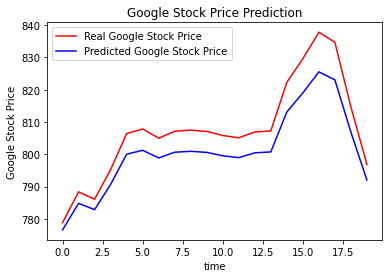

In [22]:
# Visulising the Result 
plt.plot( real_stock_price , color = 'red' , label = 'Real Google Stock Price')
plt.plot( predicted_stock_price , color = 'blue' , label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel( 'time' )
plt.ylabel( 'Google Stock Price' )
plt.legend()
plt.show()

In [25]:
from sklearn.metrics import mean_squared_error,r2_score

In [26]:
r2_score(real_stock_price,predicted_stock_price)

0.7636146737549598

In [28]:
np.sqrt(mean_squared_error(real_stock_price,predicted_stock_price))

7.1676987253074556

In [29]:
regressor.save("Google_stoke.h5py")

INFO:tensorflow:Assets written to: Google_stoke.h5py\assets


In [32]:
pwd

'C:\\Users\\Zeel\\RNN'

In [33]:
cd E:/Data Sci/Masters/Deep Learning/RNN_Part2

E:\Data Sci\Masters\Deep Learning\RNN_Part2


In [34]:
pwd

'E:\\Data Sci\\Masters\\Deep Learning\\RNN_Part2'